Name : Viraj Vinod Salunke
Roll NO : 59
Pid: 246049
EXP2 ML


In [204]:
import pandas as pd
import numpy as np
import seaborn as sns

In [205]:
df = sns.load_dataset('titanic')

In [206]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\Viraj\AppData\Local\Temp\ipykernel_15016\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

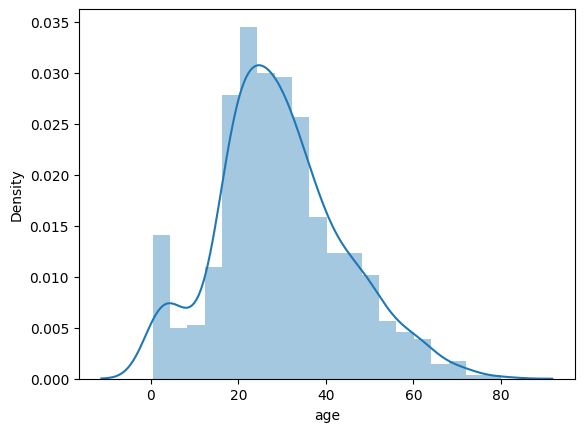

In [207]:
sns.distplot(df['age'])

In [208]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [209]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\Viraj\AppData\Local\Temp\ipykernel_15016\3494372649.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
C:\Users\Viraj\AppData\Local\Temp\ipykernel_15016\3494372649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [210]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [211]:
df.corr(numeric_only=True)['survived']

survived      1.000000
pclass       -0.338481
age          -0.069809
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

In [212]:
cat_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()

In [213]:
for i in cat_cols:
    print(f"--{i}---")
    print(df[i].value_counts())
    print("------")

--sex---
sex
male      577
female    314
Name: count, dtype: int64
------
--embarked---
embarked
S    646
C    168
Q     77
Name: count, dtype: int64
------
--who---
who
man      537
woman    271
child     83
Name: count, dtype: int64
------
--embark_town---
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
------
--alive---
alive
no     549
yes    342
Name: count, dtype: int64
------


In [214]:
df.skew(numeric_only=True).round(3)

survived      0.479
pclass       -0.631
age           0.434
sibsp         3.695
parch         2.749
fare          4.787
adult_male   -0.420
alone        -0.420
dtype: float64

In [215]:
outliers = df[['survived','pclass','age','sibsp','parch','fare','adult_male','alone']]


In [216]:
for i in outliers:
    sn = df[i].skew()
    if sn<0.5 and sn>-0.5:
        print(f"----{i}---")
        print(" -- boundary_line--")
        print("highest boundary",df[i].mean()+3*df[i].std())
        high = df[i].mean()+3*df[i].std()
        low = df[i].mean()-3*df[i].std()
        print("lowest boundary",df[i].mean()-3*df[i].std())
        print("-- trim---")
    
        outliers_df = df[(df[i] > high) | (df[i] < low)]
        outliers_df
        df[i] = np.where(
            df[i]>high,
            high,
            np.where(
                    df[i]<low,
                    low,
                    df[i]
                )
            )
        
        print("--- if found capping done----\n")
    else:
        print(f"----{i}---")
        print(" -- boundary_line--")
        
        percentile75 = df[i].quantile(0.75)
        percentile25 = df[i].quantile(0.25)
        iqr = percentile75 - percentile25
        high =percentile75+1.5*iqr
        low = percentile75-1.5*iqr
        print("high boundary",high)
        print("low boundary",low)
        outliers_df = df[(df[i] > high) | (df[i] < low)]
        outliers_df
        df[i] = np.where(
            df[i]>high,
            high,
            np.where(
                    df[i]<low,
                    low,
                    df[i]
                )
            )
        
        print("--- if found capping done----\n")
        
        
        

----survived---
 -- boundary_line--
highest boundary 1.8436157466329592
lowest boundary -1.0759389789561915
-- trim---
--- if found capping done----

----pclass---
 -- boundary_line--
high boundary 4.5
low boundary 1.5
--- if found capping done----

----age---
 -- boundary_line--
highest boundary 68.70516332506747
lowest boundary -9.306928030949834
-- trim---
--- if found capping done----

----sibsp---
 -- boundary_line--
high boundary 2.5
low boundary -0.5
--- if found capping done----

----parch---
 -- boundary_line--
high boundary 0.0
low boundary 0.0
--- if found capping done----

----fare---
 -- boundary_line--
high boundary 65.6344
low boundary -3.6343999999999994
--- if found capping done----

----adult_male---
 -- boundary_line--
highest boundary 2.071539292641477
lowest boundary -0.8661520872542716
-- trim---
--- if found capping done----

----alone---
 -- boundary_line--
highest boundary 2.071539292641477
lowest boundary -0.8661520872542716
-- trim---
--- if found capping don

C:\Users\Viraj\AppData\Local\Temp\ipykernel_15016\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

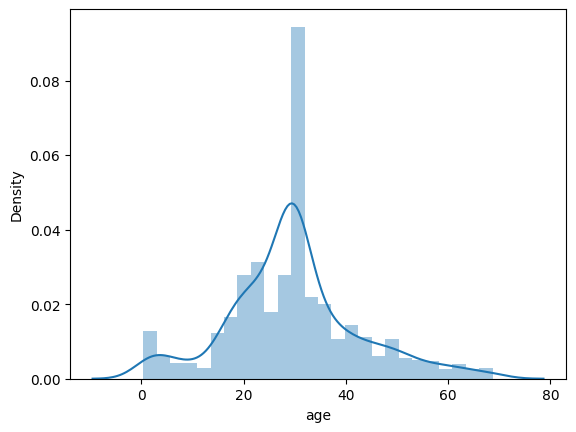

In [217]:
sns.distplot(df['age'])

In [218]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,1.0,NaN,Southampton,no,0.0
1,1.0,1.5,female,38.0,1.0,0.0,65.6344,C,First,woman,0.0,C,Cherbourg,yes,0.0
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,0.0,NaN,Southampton,yes,1.0
3,1.0,1.5,female,35.0,1.0,0.0,53.1000,S,First,woman,0.0,C,Southampton,yes,0.0
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,1.0,NaN,Southampton,no,1.0


In [219]:
X = df[['pclass','sex','age','fare','embarked']]

In [220]:
y = df['survived']

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)

In [222]:
X_train.isnull().sum()

pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

In [223]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [224]:
trf1 = ColumnTransformer([
    ('onehotencoder_sex',OneHotEncoder(sparse_output=False,handle_unknown = 'ignore'),[1]),
    ('onehotencoder_embarked',OneHotEncoder(sparse_output=False,handle_unknown = 'ignore'),[4])],
    remainder = 'passthrough')
    
    

In [225]:
trf2 = ColumnTransformer([
    ('Scaler',StandardScaler(),slice(0,None))])

In [226]:
trf3 = LogisticRegression()

In [227]:
from sklearn.pipeline import Pipeline

In [228]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [229]:
pipe.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('trf1', ...), ('trf2', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehotencoder_sex', ...), ('onehotencoder_embarked', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the out

In [230]:
y_predict = pipe.predict(X_test)

In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7932960893854749

In [232]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.7892741061755146)

In [171]:
x_test_1 = [[1.5,'male',45,24,'S']]

In [172]:
y_predict_new = pipe.predict(x_test_1)

C:\Users\Viraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Viraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [174]:
if y_predict_new == 0:
    print('not survived')
else:
    print('survived')

not survived
